In [13]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import brentq

import functions

In [14]:
def test_func(x):
    f0 = 1.2 # Hz
    return 0.9 * np.cos(2 * np.pi * f0 * x)

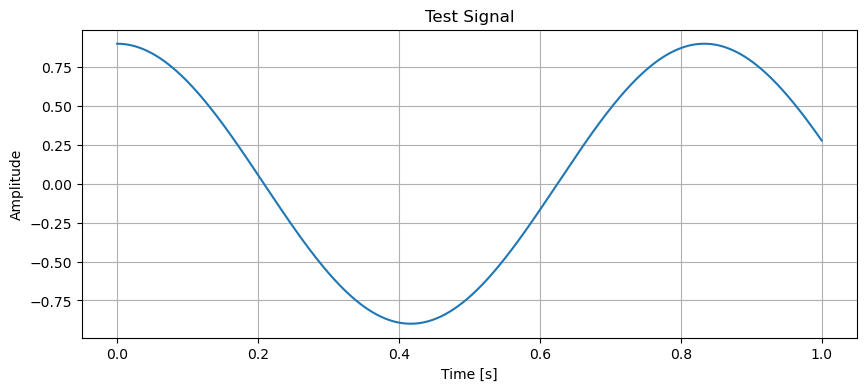

In [15]:
stop_time = 1
x= np.linspace(0, stop_time, 1000) #time vector 

plt.plot(x, test_func(x))
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.title('Test Signal')
plt.grid()

0.2


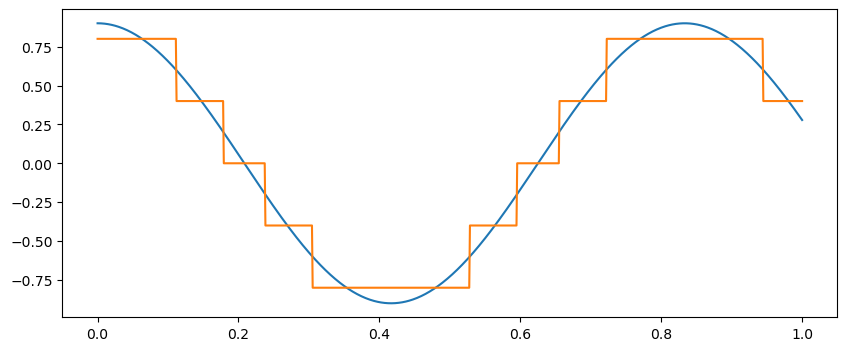

In [36]:
q = quantizer(5)
step = q.step
print(q.qthreshold(2,3))

plt.rcParams["figure.figsize"] = (10,4)
plt.plot(x, test_func(x))
plt.plot(x, q.quantize(test_func(x)));



Transition instants: [0.         0.1115502  0.17861206 0.2380546  0.30511647 0.52821686
 0.59527873 0.65472127 0.72178314 0.94488353]
Bins index: [4 3 2 1 0 1 2 3 4 3]
Quantization values: [ 0.8  0.4  0.  -0.4 -0.8 -0.4  0.   0.4  0.8  0.4]


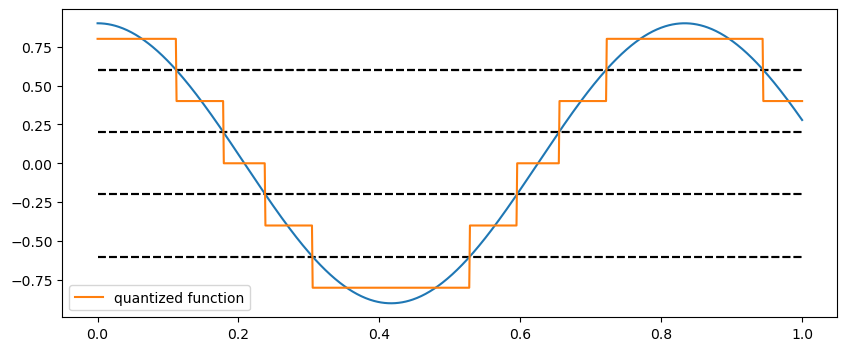

In [35]:
T = int(stop_time)

# transitions and bins
t, q_idx = amplitude_sampler(test_func, T, q)

# bins to quantization values
a = q.qvalue(q_idx)  #--> find the step y value for each bin 

print('Transition instants: {}'.format(t))
print('Bins index: {}'.format(q_idx))
print('Quantization values: {}'.format(a))

for i in range(0,len(q_idx)-1): 
    plt.hlines(q.qthreshold(q_idx[i],q_idx[i+1]), 0, 1,'black', linestyles='dashed', label='')

plt.plot(x, test_func(x));
plt.plot(x, q.quantize(test_func(x)), label='quantized function')
plt.legend()

In [79]:
Nqbits = 3; 

binary_idx = np.zeros(len(q_idx))
binary_list = []

def binary_encoding(bin_idx, Nqbits):
    for i in range(0,len(binary_idx)):
        # Convert to binary string, removing the '0b' prefix
        # Fill with zeros to have a fixed length of Nqbits

        binary_str = bin(bin_idx[i])[2:].zfill(Nqbits) 
        binary_list.append(binary_str)

def bit_extract(bi_list, idx ):
    return  [bits[idx] for bits in bi_list]



binary_encoding(q_idx, Nqbits)

print('Bins index: {}'.format(q_idx))
print('Binary encoding: {}'.format(binary_list))
print(bit_extract(binary_list, 1))




Bins index: [4 3 2 1 0 1 2 3 4 3]
Binary encoding: ['100', '011', '010', '001', '000', '001', '010', '011', '100', '011']
['0', '1', '1', '0', '0', '0', '1', '1', '0', '1']
